In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


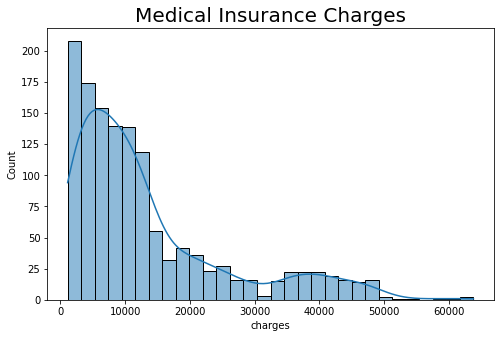

In [6]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('Medical Insurance Charges', fontsize=20)
plt.show()

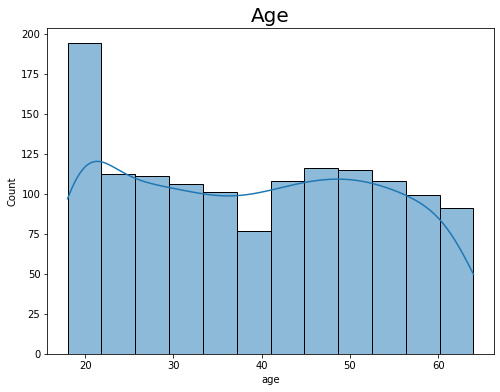

In [7]:
# Histrogram of Age:
plt.figure(figsize=(8,6))
sns.histplot(df['age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

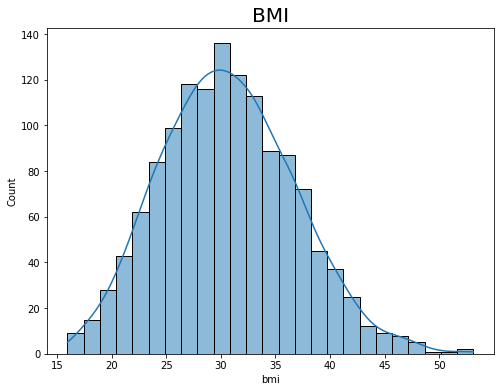

In [8]:
# Histrogram of bmi	:
plt.figure(figsize=(8,6))
sns.histplot(df['bmi'],kde=True)
plt.title('BMI', fontsize=20)
plt.show()

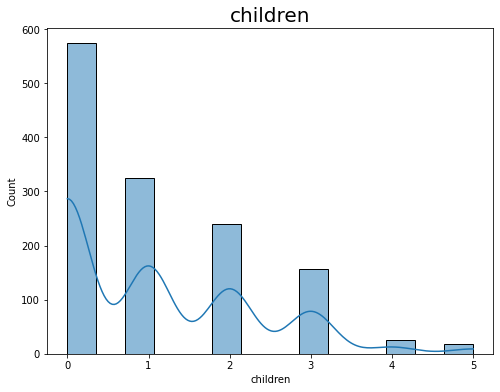

In [9]:
# Histrogram of children	:
plt.figure(figsize=(8,6))
sns.histplot(df['children'], kde=True)
plt.title('children', fontsize=20)
plt.show()

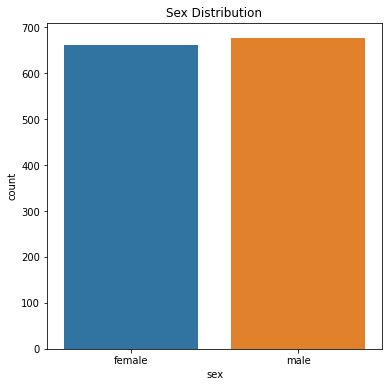

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

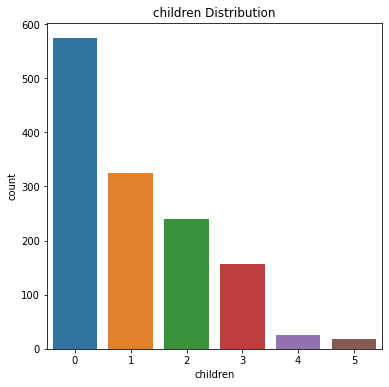

In [13]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('children Distribution')
plt.show()

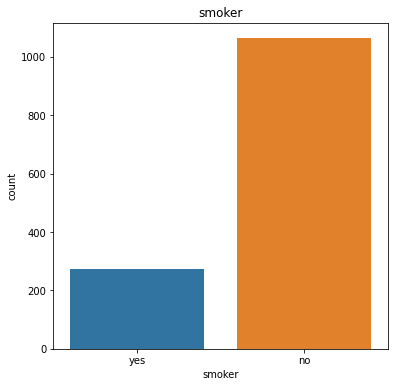

In [14]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

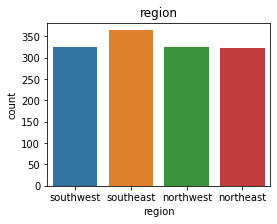

In [15]:
# region column
plt.figure(figsize=(4,3))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [16]:
# Encoding:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


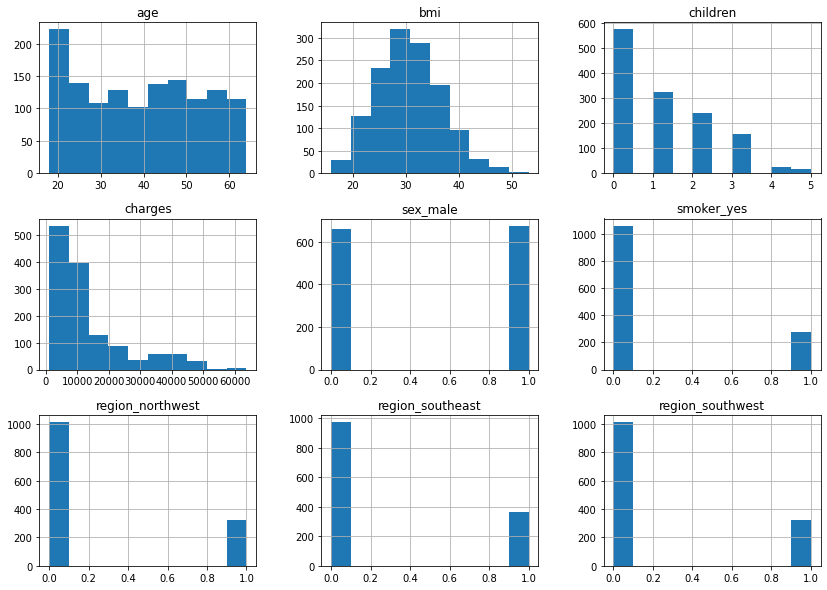

In [18]:
df.hist(figsize=(14,10))
plt.show()

<AxesSubplot:>

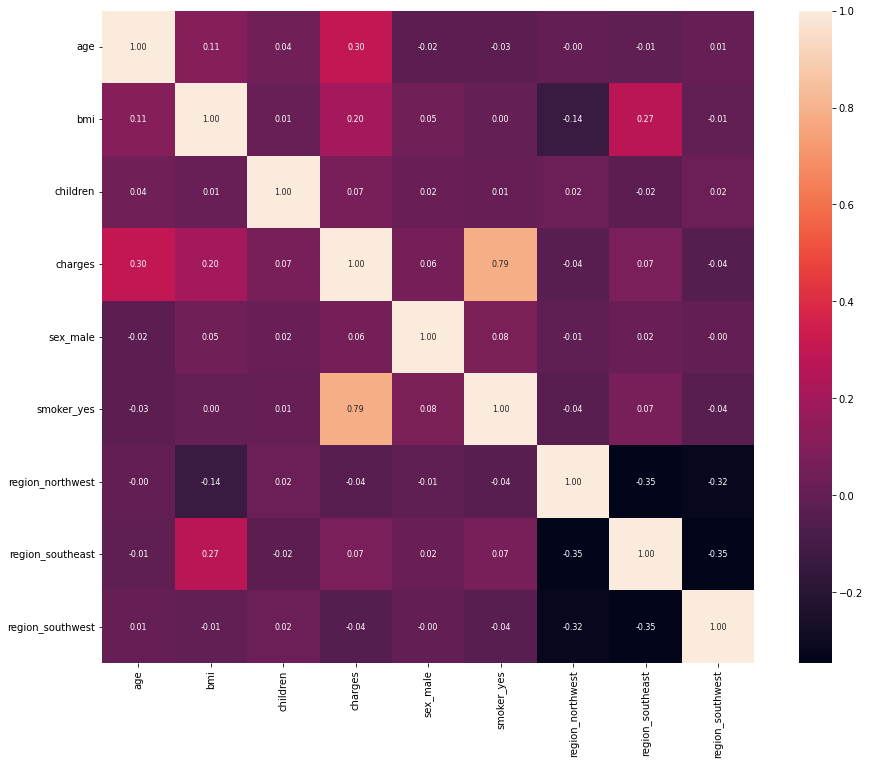

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cbar='True',square = 'True',annot = True ,annot_kws={'size':8},fmt='.2F')

In [20]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [21]:
print(X)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

1070 268 1070 268


In [25]:
rg = LinearRegression()

In [26]:
rg.fit(X_train,Y_train)

LinearRegression()

In [27]:
# prediction on training data
training_data_prediction =rg.predict(X_train)

In [28]:
from sklearn  import metrics
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7520187377309014


In [29]:
test_data_prediction =rg.predict(X_test)

In [30]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7449415564623685


In [32]:
rg.predict([[19,27.900 ,0,0,1,0,0,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25264.89470869])

In [33]:
input_data = (19,27.900 ,0,0,1,0,0,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[25264.89470869]
The insurance cost is USD  25264.89470869011


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle

In [35]:
filename = 'trained_model.sav'
pickle.dump(rg, open(filename, 'wb'))

In [36]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [37]:
loaded_model.predict([[19,27.900 ,0,0,1,0,0,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25264.89470869])